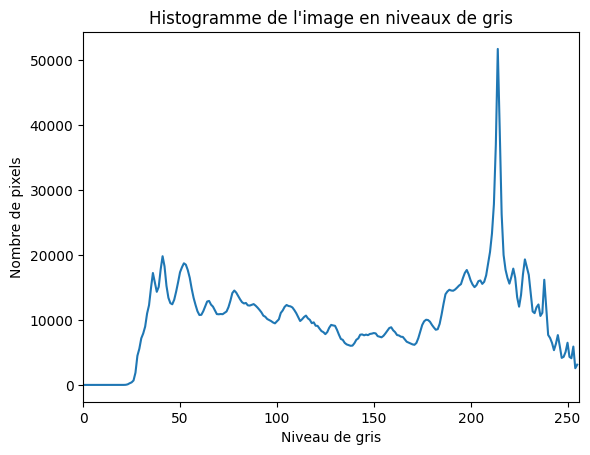

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

img = cv2.imread('X-ray_chest_cancer.jpg')

def HistogImageNG(image):
    histo = [0] * 256

    h, w = image.shape
    for i in range(h):
        for j in range(w):
            pixel_value = image[i, j]
            histo[pixel_value] += 1

    plt.figure()
    plt.title('Histogramme de l\'image en niveaux de gris')
    plt.xlabel('Niveau de gris')
    plt.ylabel('Nombre de pixels')
    plt.plot(histo)
    plt.xlim([0, 256])
    plt.show()
##conversion niveau de gris
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
HistogImageNG(gray_img)


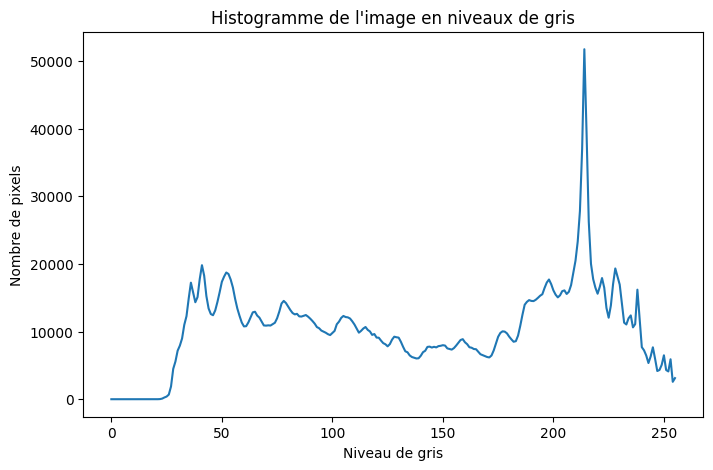

(-0.5, 1704.5, 1577.5, -0.5)

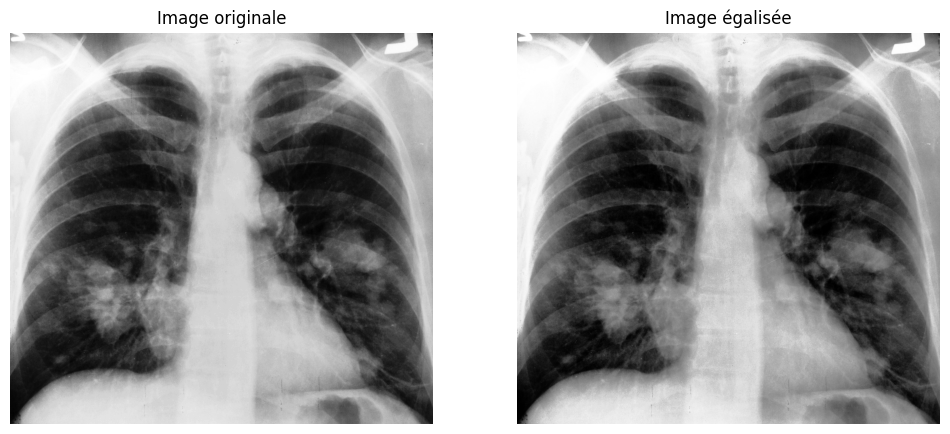

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Lire l'image en niveaux de gris
img = cv2.imread('X-ray_chest_cancer.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 2. Afficher l'histogramme de l'image
plt.figure(figsize=(8, 5))
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme de l\'image en niveaux de gris')
plt.show()

img_eq = cv2.equalizeHist(gray_img)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_img,cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_eq, cmap='gray')
plt.title('Image égalisée')
plt.axis('off')




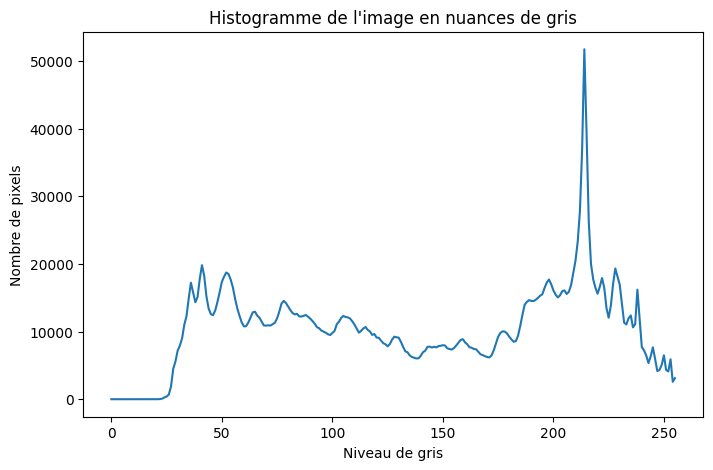

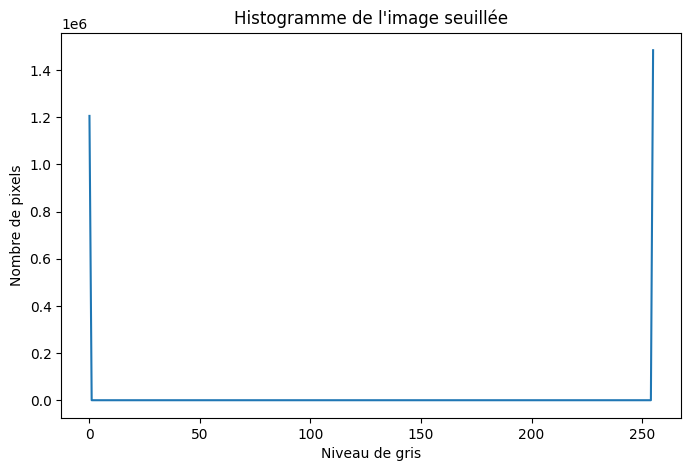

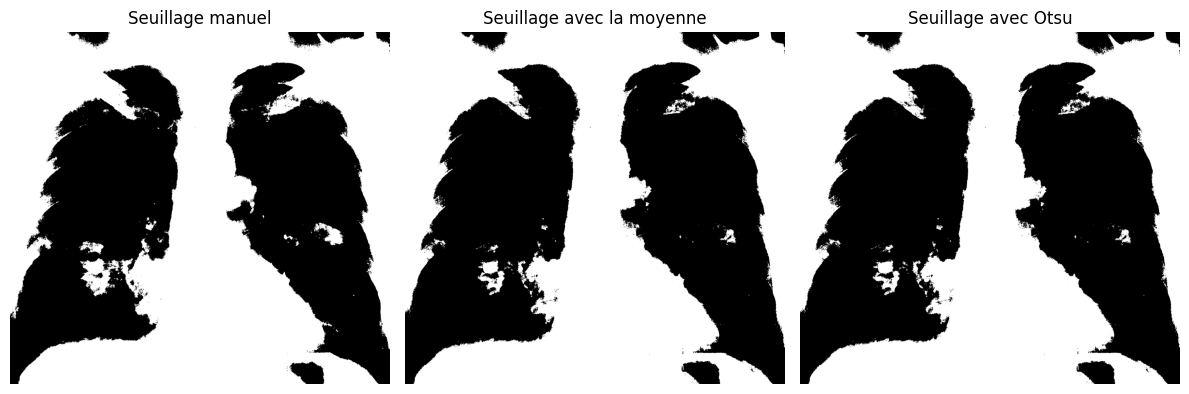

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_gray = cv2.imread('X-ray_chest_cancer.jpg', cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(8, 5))
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme de l\'image en nuances de gris')
plt.show()


def seuillage(img, seuil):
    ret, img_bin = cv2.threshold(img, seuil, 255, cv2.THRESH_BINARY)
    return img_bin


seuil = 127
img_bin = seuillage(img_gray, seuil)


cv2.imwrite('nature_seuil.jpg', img_bin)

plt.figure(figsize=(8, 5))
hist_bin = cv2.calcHist([img_bin], [0], None, [256], [0, 256])
plt.plot(hist_bin)
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme de l\'image seuillée')
plt.show()

_, img_mean = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

_, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_bin, cmap='gray')
plt.title('Seuillage manuel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_mean, cmap='gray')
plt.title('Seuillage avec la moyenne')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_otsu, cmap='gray')
plt.title('Seuillage avec Otsu')
plt.axis('off')

plt.tight_layout()
plt.show()


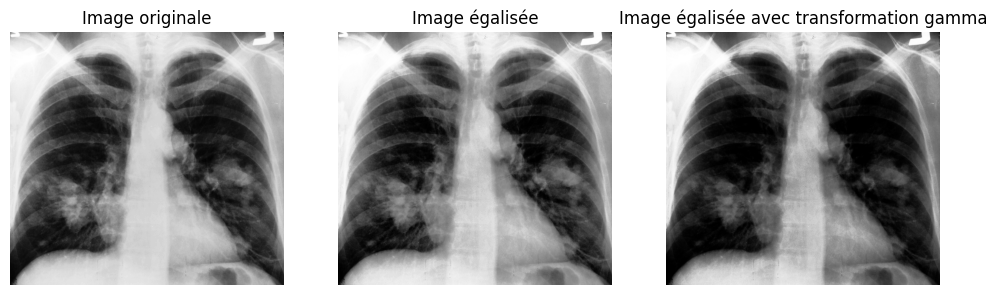

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('X-ray_chest_cancer.jpg', cv2.IMREAD_GRAYSCALE)

img_eq = cv2.equalizeHist(img)

gamma = 1.5

gamma_correction = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

img_gamma = cv2.LUT(img_eq, gamma_correction)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_eq, cmap='gray')
plt.title('Image égalisée')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gamma, cmap='gray')
plt.title('Image égalisée avec transformation gamma')
plt.axis('off')

plt.show()


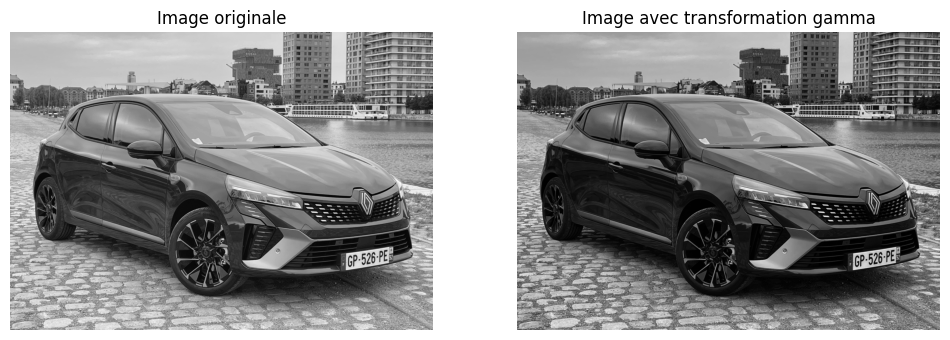

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

gamma = 1.5

table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

gamma_corrected = cv2.LUT(img, table)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Image avec transformation gamma')
plt.axis('off')

plt.show()


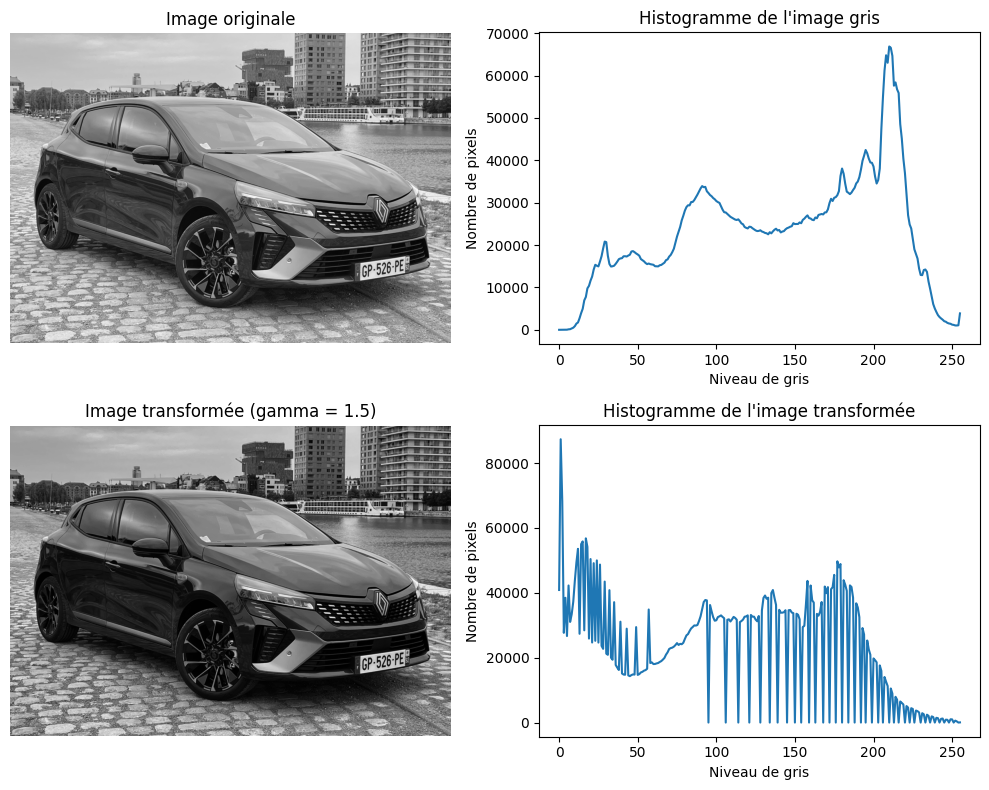

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
normalized_img = gray_img / 255.0
gamma = 1.5
gamma_corrected = np.uint8(gamma_corrected * 255)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_gamma = cv2.calcHist([gamma_corrected], [0], None, [256], [0, 256])
plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist)
plt.title('Histogramme de l\'image gris')
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')

plt.subplot(2, 2, 3)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Image transformée (gamma = 1.5)')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.plot(hist_gamma)
plt.title('Histogramme de l\'image transformée')
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')

plt.tight_layout()
plt.show()
